# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [307]:
# Import your libraries:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [309]:
websites = pd.read_csv('data/website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [311]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [312]:
websites.shape

(1781, 21)

In [313]:
# What are the data types?
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [314]:
# Which columns contain the features of the websites?
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [315]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
websites["Type"]

0       1
1       0
2       0
3       0
4       0
       ..
1776    1
1777    1
1778    0
1779    0
1780    0
Name: Type, Length: 1781, dtype: int64

In [316]:
# 0 for bening 1 for maliciuos websites

In [317]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
websites.nunique()
# Categóricas nominales : Características comunes a diferentes websites que podrían ser convertidas a ordinales para ML
# CHARSET                       object
# SERVER                        object
# WHOIS_COUNTRY                 object
# WHOIS_STATEPRO                object

# Fechas: Nominales a convertir a datatime para poder manipularlas
# WHOIS_REGDATE                 object
# WHOIS_UPDATED_DATE            object

URL                          1781
URL_LENGTH                    142
NUMBER_SPECIAL_CHARACTERS      31
CHARSET                         8
SERVER                        238
CONTENT_LENGTH                637
WHOIS_COUNTRY                  48
WHOIS_STATEPRO                181
WHOIS_REGDATE                 890
WHOIS_UPDATED_DATE            593
TCP_CONVERSATION_EXCHANGE     103
DIST_REMOTE_TCP_PORT           66
REMOTE_IPS                     18
APP_BYTES                     825
SOURCE_APP_PACKETS            113
REMOTE_APP_PACKETS            116
SOURCE_APP_BYTES              885
REMOTE_APP_BYTES              822
APP_PACKETS                   113
DNS_QUERY_TIMES                10
Type                            2
dtype: int64

#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

In [319]:
# 1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.
websites_num = websites.select_dtypes(include=['int64', 'float64'])
websites_num_corr = websites_num.corr()
websites_num_corr['Type'].sort_values(ascending=False)


Type                         1.000000
NUMBER_SPECIAL_CHARACTERS    0.280897
URL_LENGTH                   0.162104
DNS_QUERY_TIMES              0.068753
REMOTE_APP_BYTES            -0.011004
APP_BYTES                   -0.011262
REMOTE_APP_PACKETS          -0.032897
SOURCE_APP_PACKETS          -0.034414
APP_PACKETS                 -0.034414
TCP_CONVERSATION_EXCHANGE   -0.040202
SOURCE_APP_BYTES            -0.043852
REMOTE_IPS                  -0.078783
DIST_REMOTE_TCP_PORT        -0.082925
CONTENT_LENGTH              -0.090852
Name: Type, dtype: float64

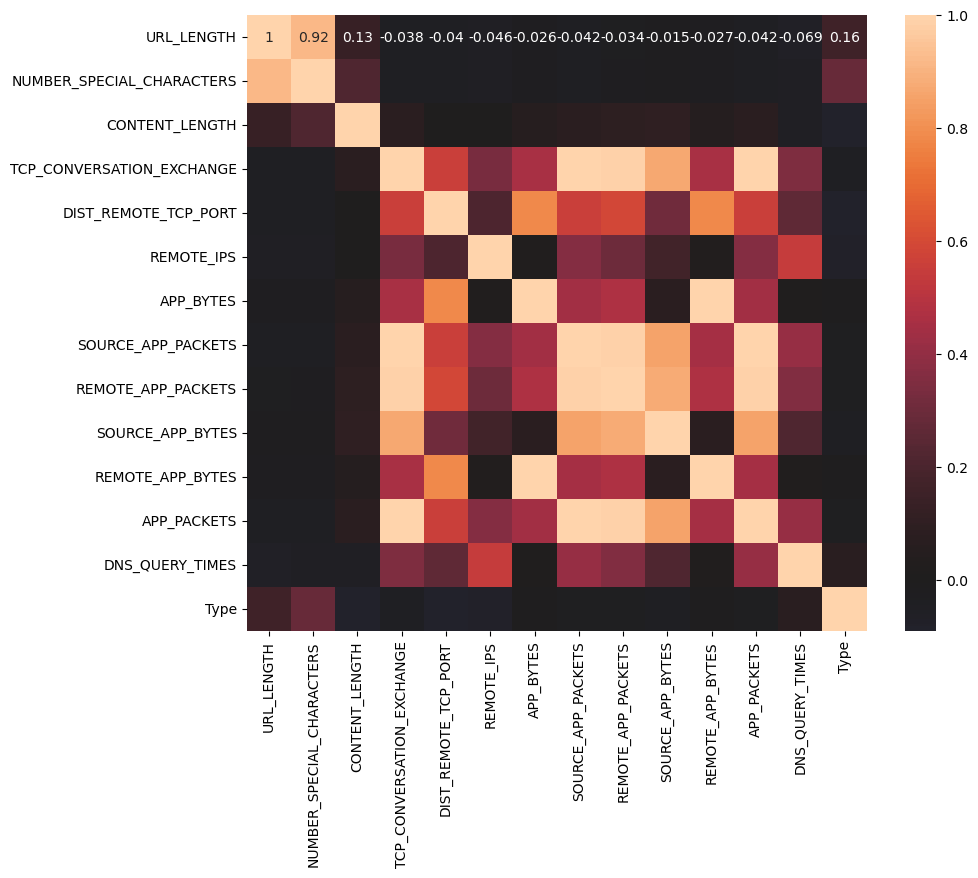

In [320]:
# 2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.
plt.figure(figsize=(10,8))
sns.heatmap(websites_num_corr, annot=True,center=0)
plt.show()

In [321]:
# 3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.
# Con respecto a "Type", los valores con mayor correlación son: 
# NUMBER_SPECIAL_CHARACTERS    0.280897
# URL_LENGTH                   0.162104
# De acuerdo a la matriz de correlación, no existe una columna con alta colinealidad (+/-0.7) que requiera ser eliminada

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [323]:
# ! pip install xgboost
# import xgboost as xgb
from xgboost import XGBClassifier as xgb


In [324]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites['Type']

model = XGBClassifier()

In [325]:
model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [326]:
sort_idx = model.feature_importances_.argsort()

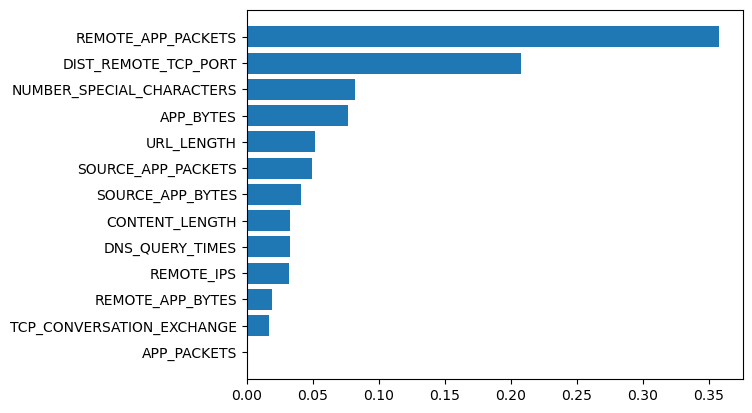

In [327]:
plt.barh(X.columns[sort_idx],model.feature_importances_[sort_idx])
plt.show();

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [330]:
websites_num_corr = websites_num.corr()
websites_num_corr.filter(['NUMBER_SPECIAL_CHARACTERS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'REMOTE_APP_BYTES', 'APP_PACKETS']
)

,NUMBER_SPECIAL_CHARACTERS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,REMOTE_APP_BYTES,APP_PACKETS
URL_LENGTH,0.917986,-0.042264,-0.033779,-0.026686,-0.042264
NUMBER_SPECIAL_CHARACTERS,1.000000,-0.040096,-0.030597,-0.024098,-0.040096
CONTENT_LENGTH,0.214225,0.074142,0.091077,0.047595,0.074142
TCP_CONVERSATION_EXCHANGE,-0.037459,0.997796,0.990848,0.458702,0.997796
DIST_REMOTE_TCP_PORT,-0.042619,0.558612,0.591188,0.781212,0.558612
REMOTE_IPS,-0.047103,0.361104,0.304683,0.025324,0.361104
APP_BYTES,-0.023914,0.445822,0.468999,0.999992,0.445822
SOURCE_APP_PACKETS,-0.040096,1.000000,0.989285,0.447448,1.000000
REMOTE_APP_PACKETS,-0.030597,0.989285,1.000000,0.470401,0.989285
SOURCE_APP_BYTES,-0.014376,0.857495,0.880555,0.075328,0.857495


In [331]:
# REMOVE THE 4 COLUMNS WITH MORE COLLINEARITY
umbral = 0.9
col_eliminar = []


for col in range(len(websites_num_corr.columns)): # Iteramos sobre columnas
    for fila in range(col): # Iteramos sobre las filas de esas columnas
        if abs(websites_num_corr.iloc[col, fila]) > umbral: # comprobamos si la correlación (absoluta) es mayor que el umbral
            col_nombre = websites_num_corr.columns[col] # Sacamos el nombre de la columna que cumple la condición
            col_eliminar.append(col_nombre) # Recuperamos las columnas a eliminar en la lista col_eliminar
            break
print(f"{col_eliminar}")


['NUMBER_SPECIAL_CHARACTERS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'REMOTE_APP_BYTES', 'APP_PACKETS']


In [440]:
# Eliminamos las siguientes columnas que pueden tener valores similares y por lo tanto, redundantes:
#['NUMBER_SPECIAL_CHARACTERS' -> alta corr. con URL_lenght, 'SOURCE_APP_PACKETS' -> APP_PACKETS, 'REMOTE_APP_PACKETS' -> SOURCE_APP_PACKETS y REMOTE_APP_PACKETS, 'REMOTE_APP_BYTES'-> APP_BYTES, 'APP_PACKETS']
# websites_num_corr.filter(['NUMBER_SPECIAL_CHARACTERS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'REMOTE_APP_BYTES', 'APP_PACKETS'])

websites_cleaned = websites.drop(columns=col_eliminar)
websites_num_cleaned = websites_num.drop(columns=col_eliminar) # df con variables numéricas para matriz corr.

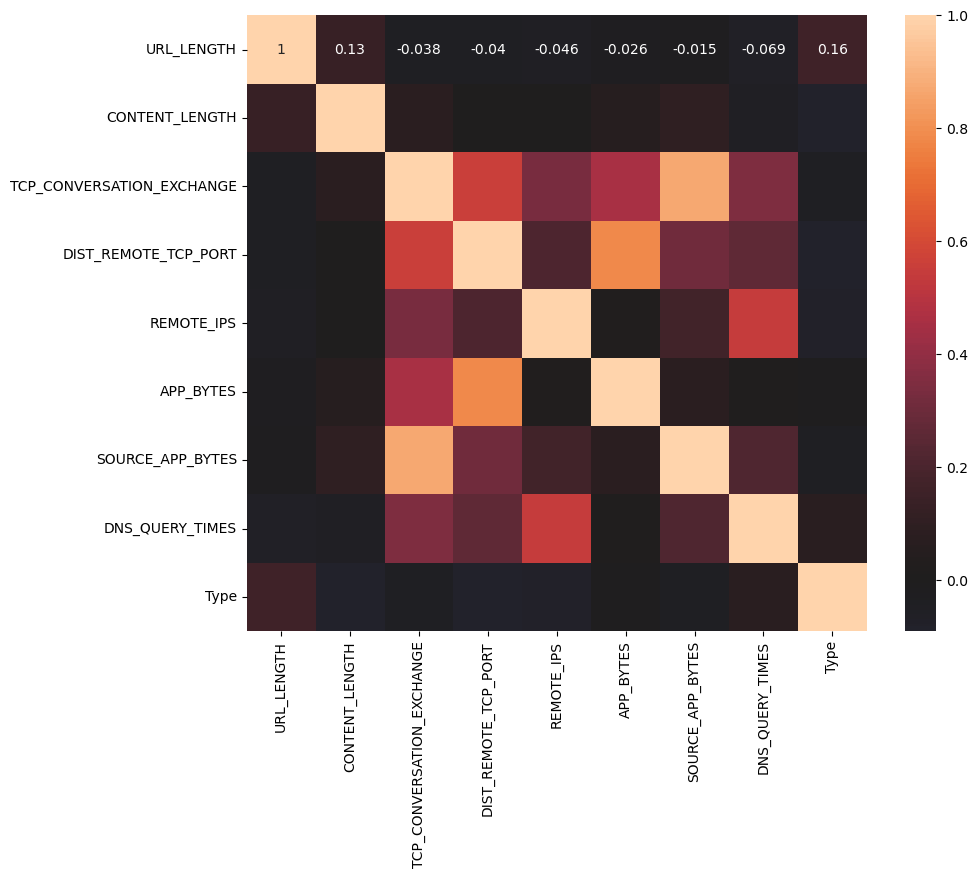

In [442]:
# Heatmap para columnas restantes
plt.figure(figsize=(10,8))
sns.heatmap(websites_num_cleaned.corr(), annot=True,center=0)
plt.show()

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [444]:
websites_cleaned.isnull().sum()

URL                            0
URL_LENGTH                     0
CHARSET                        7
SERVER                       155
CONTENT_LENGTH               714
WHOIS_COUNTRY                  0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [446]:
# Firts we will drop the columns with more than 50% of missing data
missing = websites.isnull().sum() / len(websites) * 100
col_eliminar_missing = missing[missing > 50].index
websites_cleaned = websites_cleaned.drop(columns=col_eliminar_missing)
websites_cleaned

,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
3,B0_113,17,ISO-8859-1,nginx,162.0,US,31,22,3,3812,18784,8.0,0
4,B0_403,17,UTF-8,NaN,124140.0,US,57,2,5,4278,129889,4.0,0
5,B0_2064,18,UTF-8,nginx,NaN,OTHER,11,6,9,894,838,0.0,0
6,B0_462,18,iso-8859-1,Apache/2,345.0,US,12,0,3,1189,8559,2.0,0
7,B0_1128,19,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,UTF-8,Apache,NaN,ES,0,0,0,0,186,0.0,1
1777,M4_41,198,UTF-8,Apache,NaN,ES,0,0,0,0,124,0.0,1
1778,B0_162,201,utf-8,Apache/2.2.16 (Debian),8904.0,US,83,2,6,6631,132181,4.0,0
1779,B0_1152,234,ISO-8859-1,cloudflare-nginx,NaN,US,0,0,0,0,0,0.0,0


In [448]:
# Now we will drop the rows with missing data
websites_cleaned = websites_cleaned.dropna()

#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [451]:
# Examine missing values in each column
websites_cleaned.isnull().sum()

URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [461]:
websites.WHOIS_COUNTRY.value_counts() # Unique values of WHOIS_COUNTRY
websites = websites.dropna(subset='WHOIS_COUNTRY')

In [463]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : good_country[x])




KeyError: 'OTHER'

In [465]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'OTHER', 'UK', 'AU', 'CA', 'PA', 'IN', 'FR', 'JP', 'CN',
       'ES'], dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [468]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

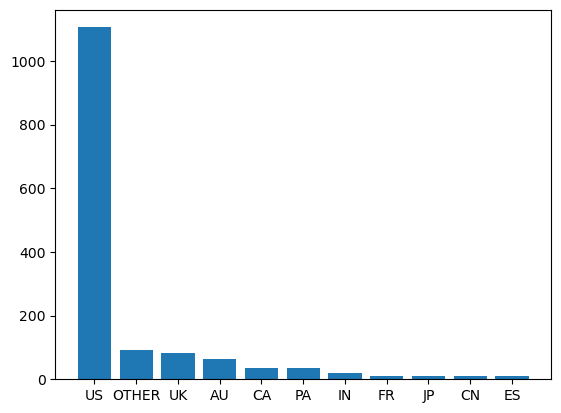

<Figure size 1500x1500 with 0 Axes>

In [470]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [473]:
# Sacamos los índices de los 10 primeros valores de WHOIS_COUNTRY más frecuentes
top10countries = websites.WHOIS_COUNTRY.value_counts().sort_values(ascending=False).head(10).index

In [475]:
# Volvemos a etiquetar el resto de columnas con OTHER
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda ind: ind if ind in top10countries else 'OTHER')

websites['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US       1106
OTHER     100
CA         84
ES         63
UK         35
AU         35
PA         21
JP         11
IN         10
CN         10
Name: count, dtype: int64

Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [478]:
websites = websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'] )
websites.info()

KeyError: "['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'] not found in axis"

# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [481]:
websites_cleaned.dtypes

URL                           object
URL_LENGTH                     int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [488]:
websites_cleaned = websites_cleaned.drop(columns="URL")
websites_cleaned.dtypes

URL_LENGTH                     int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [561]:
# websites_cleaned['CHARSET'].value_counts()
# websites_cleaned.nunique() #6
websites_cleaned = websites_cleaned.drop(columns='CHARSET')

KeyError: "['CHARSET'] not found in axis"

`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [564]:
websites_cleaned['SERVER'].value_counts()

SERVER
Other                    312
Apache                   172
Microsoft-HTTPAPI/2.0     86
nginx                     59
GSE                       46
Name: count, dtype: int64

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [567]:
top4servers = websites_cleaned["SERVER"].value_counts().sort_values(ascending=False).head(4).index
websites_cleaned["SERVER"] = websites_cleaned["SERVER"].apply(lambda ind: ind if ind in top4servers else "Other")

In [569]:
# Count `SERVER` value counts here
websites_cleaned["SERVER"].value_counts()

SERVER
Other                    358
Apache                   172
Microsoft-HTTPAPI/2.0     86
nginx                     59
Name: count, dtype: int64

OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [572]:
# Convertir columnas categóricas en datos ordinales usando get_dummies con drop_first=True y guarda datos con valores ficticios en website_dummy
# drop_first=True : Elimina la primera categoría (la que más valores tiene WHOIS_COUNTRY_US y SERVER_Other) de cada columna para evitar colinealidad
website_dummy = pd.get_dummies(websites_cleaned, columns=['WHOIS_COUNTRY', 'SERVER'], drop_first=True)

Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [575]:
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 3 to 1780
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL_LENGTH                    675 non-null    int64  
 1   CONTENT_LENGTH                675 non-null    float64
 2   TCP_CONVERSATION_EXCHANGE     675 non-null    int64  
 3   DIST_REMOTE_TCP_PORT          675 non-null    int64  
 4   REMOTE_IPS                    675 non-null    int64  
 5   APP_BYTES                     675 non-null    int64  
 6   SOURCE_APP_BYTES              675 non-null    int64  
 7   DNS_QUERY_TIMES               675 non-null    float64
 8   Type                          675 non-null    int64  
 9   WHOIS_COUNTRY_CA              675 non-null    bool   
 10  WHOIS_COUNTRY_CN              675 non-null    bool   
 11  WHOIS_COUNTRY_FR              675 non-null    bool   
 12  WHOIS_COUNTRY_IN              675 non-null    bool   
 13  WHOIS_COU

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [578]:
from sklearn.model_selection import train_test_split

X = website_dummy.drop(columns=['Type'])
y = website_dummy['Type']

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=310789)

#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [581]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [584]:
model.fit(X_entrenamiento, y_entrenamiento)

C:\Users\az14o\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [591]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Hacemos la predicción sobre los datos de prueba
y_pred = model.predict(X_prueba)

In [601]:
conf_matrix= confusion_matrix(y_prueba, y_pred)
accuracy = accuracy_score(y_prueba, y_pred)

print(f"Matriz de Confusión:\n{conf_matrix}") #TN / FP | FN / TP
print(f"\n Accuracy:  {accuracy}")

Matriz de Confusión:
[[122   5]
 [  4   4]]

 Accuracy:  0.9333333333333333


¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

In [ ]:
El ratio de preicciones correctas es muy elevado, y tanto los falsos positivos como los falsos negativos son reduicidos, por lo que podemos afirmar que se trata  de un modelo que clasifica muy bien cada instancia

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [603]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo de árbol de decisión con 3 nodos (modelo simple, menor overfitting a datos entrenamiento)
arbol_decision = DecisionTreeClassifier(max_depth=3)

# Ajustar el modelo
arbol_decision.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(max_depth=3)

Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [606]:
# Calcular probabilidades predichas
# predict_proba devuelve las prob de pertenencia a cada clase para las muestras de X_prueba
## -> Devuelve una matriz (n_samples, n_clases), nos quedamos con todas las filas de la segunda columna con las prob de que cada muestra X_prueba pertenezca a clase 1
y_prob = arbol_decision.predict_proba(X_prueba)[:, 1]

y_prob

array([0.        , 0.015625  , 0.015625  , 0.        , 0.015625  ,
       0.015625  , 0.        , 0.015625  , 0.015625  , 0.015625  ,
       0.        , 0.09090909, 0.        , 0.        , 0.3030303 ,
       0.015625  , 0.        , 0.        , 0.3030303 , 0.3030303 ,
       0.015625  , 0.        , 0.        , 0.        , 0.3030303 ,
       0.015625  , 0.        , 0.        , 0.        , 0.015625  ,
       0.        , 0.3030303 , 0.        , 0.3030303 , 0.        ,
       0.        , 0.        , 0.3030303 , 0.        , 0.3030303 ,
       0.3030303 , 0.015625  , 0.        , 0.        , 0.        ,
       0.        , 0.015625  , 0.3030303 , 0.        , 0.        ,
       0.015625  , 0.        , 0.        , 0.        , 0.        ,
       0.015625  , 0.        , 0.        , 0.015625  , 0.015625  ,
       0.015625  , 0.        , 0.        , 0.        , 0.3030303 ,
       0.3030303 , 0.015625  , 0.        , 0.015625  , 0.        ,
       0.3030303 , 0.        , 0.        , 0.015625  , 0.     

In [610]:
# # Decidir 0 o 1 utilizando un umbral de 0.5
y_pred_arbol_umbral = (y_prob >= 0.5).astype(int)

y_pred_arbol_umbral

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [614]:
# Calcular matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba)
conf_matrix_arbol = confusion_matrix(y_prueba, y_pred_arbol_umbral)
accuracy_arbol = accuracy_score(y_prueba, y_pred_arbol_umbral)

print(f"Matriz de Confusión:\n{conf_matrix_arbol}") #TN / FP | FN / TP
print(f"\n Accuracy:  {accuracy_arbol}")

Matriz de Confusión:
[[123   4]
 [  6   2]]

 Accuracy:  0.9259259259259259


#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [623]:
# Inicializar el modelo de árbol de decisión con 5 nodos (modelo simple, menor overfitting a datos entrenamiento)
arbol_decision_5 = DecisionTreeClassifier(max_depth=5)
# Ajustar el modelo
arbol_decision_5.fit(X_entrenamiento, y_entrenamiento)
# Calcular probabilidades predichas
y_prob_5 = arbol_decision_5.predict_proba(X_prueba)[:, 1]
# # Decidir 0 o 1 utilizando un umbral de 0.5
y_pred_arbol_umbral = (y_prob_5 >= 0.5).astype(int)
# Calcular matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba)
conf_matrix_arbol = confusion_matrix(y_prueba, y_pred_arbol_umbral)
accuracy_arbol = accuracy_score(y_prueba, y_pred_arbol_umbral)

print(f"Matriz de Confusión:\n{conf_matrix_arbol}") #TN / FP | FN / TP
print(f"\n Accuracy:  {accuracy_arbol}")


Matriz de Confusión:
[[117  10]
 [  3   5]]

 Accuracy:  0.9037037037037037


In [626]:
# Disminuye la precisión al aumentar el número de nodos

¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión:

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [387]:
# Your code here

## Conclusiones:

Add your comments here: